In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [22]:
def calc_auv2_accel(T, alpha, theta, mass=100):
    """given a np array of forces in newtons, an alpha offset of the motor in radians, and a theta offset of the vehicle in radians, and the mass of the vehicle  in kgs, reutrns the a 2d array of the vehicle's accleration in m/s^2"""
    if mass <= 0:
        raise ZeroDivisionError("can't divide by 0/negative mass")
    Thorz = T * math.cos(alpha)
    Tvert = T * math.sin(alpha)
    tothorizontal = Thorz[0] + Thorz[1] - Thorz[2] - Thorz[3]
    totvertical = Tvert[0] - Tvert[1] - Tvert[2] + Tvert[3]
    accel = np.array([tothorizontal, totvertical])
    rotate = np.array(
        [[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]
    )
    return np.dot(rotate, accel) / mass



def calc_auv2_ang_accel(T, alpha, L, l, inertia=100):
    Thorz = T * np.sin(alpha)
    Tvert = T * np.cos(alpha)
    torques = l * Thorz + L * Tvert
    return (torques[0] - torques[1] + torques[2] - torques[3])/inertia


def sim_auv_motion(
    T, alpha, L, l, lmass, inertia, dt=0.1, t_final=10, x0=0, y0=0, theta=0
):
    count = 0
    curang = theta
    timestamps = np.array([0])
    x = np.array([x0])
    y = np.array([y0])
    theta = np.array([theta])
    v = np.array([0, 0])
    omega = np.array([0])
    a = np.array([0, 0])
    while count <= t_final:
        count += dt
        timestamps = np.append(timestamps, count)
        accel = calc_auv2_accel(T, alpha, curang, lmass)
        a = np.append(a, accel)
        angaccel = calc_auv2_ang_accel(T, alpha, L, l, inertia)
        newv = v[-1] + accel * dt
        newomega = omega[-1] + angaccel * dt
        v = np.append(v, newv)
        omega = np.append(omega, newomega)
        newtheta = theta[-1] + omega[-2]* dt + 0.5 * angaccel * dt * dt
        print(newtheta)
        theta = np.append(theta, newtheta)
        curang = newtheta
        newcoords = np.array([x[-1], y[-1]]) + v[-2]* dt + 0.5 * accel * dt * dt
        x = np.append(x, newcoords[0])
        y = np.append(y, newcoords[1])
    return timestamps, x, y, theta, v, omega, a


0.007071067811865475
0.0282842712474619
0.06363961030678927
0.1131370849898476
0.1767766952966369
0.2545584412271571
0.3464823227814082
0.4525483399593903
0.5727564927611034
0.7071067811865475
0.8555992052357224
1.0182337649086284
1.1950104602052651
1.385929291125633
1.5909902576697317
1.8101933598375615
2.043538597629122
2.2910259710444136
2.552655480083436
2.828427124746189
3.118340905032673
3.4223968209428883
3.7405948724768345
4.072935059634512
4.4194173824159195
4.780041840821059
5.154808434849929
5.54371716450253
5.946768029778862
6.363961030678925
6.795296167202719
7.240773439350243
7.700392847121499
8.174154390516486
8.662058069535204
9.164103884177655
9.680291834443835
10.210621920333747
10.755094141847389
11.313708498984761
11.886464991745866
12.473363620130701
13.074404384139267
13.689587283771564
14.318912319027591
14.96237948990735
15.61998879641084
16.29174023853806
16.97763381628901
17.677669529663692
18.391847378662103
19.120167363284246
19.86262948353012
20.61923373939

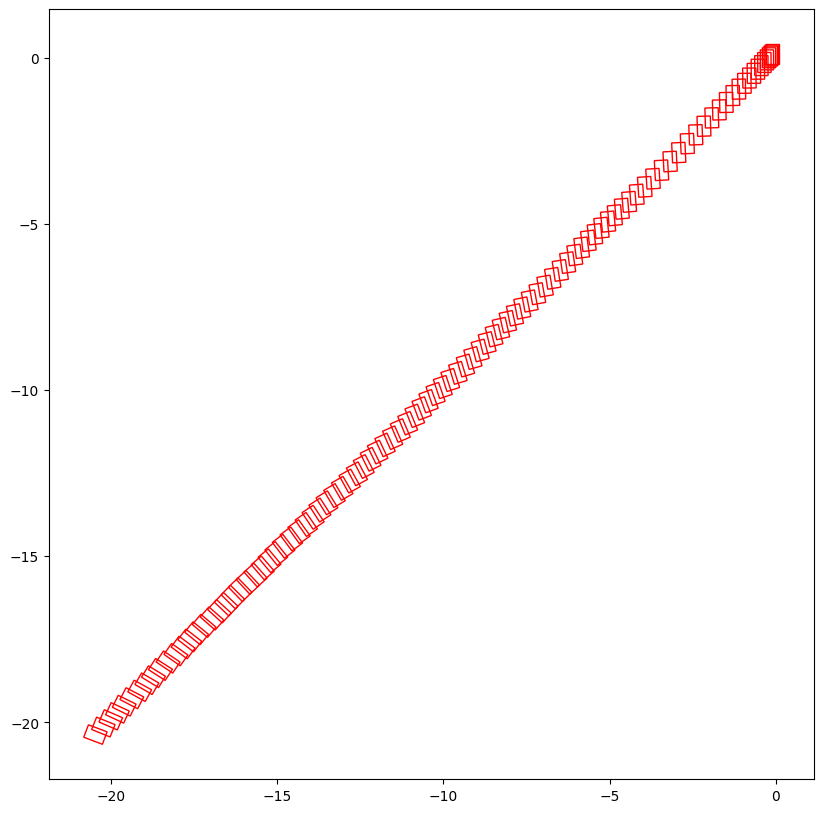

In [28]:
import matplotlib.patches as patches
t_final = 10
dt = 0.1
l = 0.2
L = 0.3

timestamps, x, y, theta, v, omega, a = sim_auv_motion(np.array([2,1,2,1]), math.pi/4, 0.3, 0.2, 1, 1)
fig = plt.figure(figsize=(10, 10))
plt.plot()
plt.gca().set_aspect("equal", adjustable="box")

for i in range(int(t_final / dt)):
    plt.gca().add_patch(
        patches.Rectangle(
            (x[i]-L, y[i]-l),
            2 * l,
            2 * L,
            angle=theta[i],
            edgecolor="red",
            facecolor="none",
            rotation_point = "center",
            lw=1,
        )
    )
    
   

plt.savefig("plot.png")